1. 촛불과 비슷한 색을 제외시키기 위해 임의로 이미지의 촛불이 아닌 부분(건물 외벽 등)을 제거
2. (h 색깔, s 채도, v 밝기)로 변환하여 v만을 핸들링
3. 촛불의 개수를 카운트하기 위해 이미지 특정 픽셀의 개수 합을 계산

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
candle = plt.imread('/gdrive/My Drive/전산통계/image/candle.jpg')

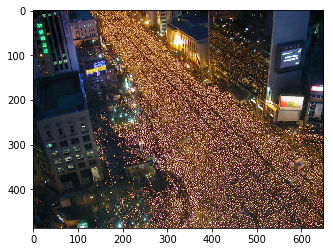

In [0]:
plt.imshow(candle)
plt.show()

In [0]:
candle.shape

(487, 650, 3)

In [0]:
R_candle = candle[:,:,0]
G_candle = candle[:,:,1]
B_candle = candle[:,:,2]

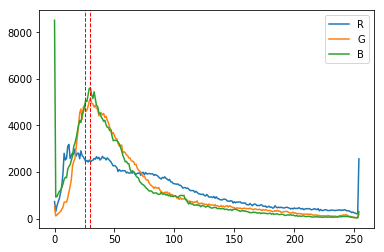

In [0]:
hi_R_candle, bins = np.histogram(R_candle, bins=np.arange(256))
hi_G_candle,  bins = np.histogram(G_candle, bins=np.arange(256))
hi_B_candle,  bins = np.histogram(B_candle, bins=np.arange(256))
fig, ax = plt.subplots()
ax.plot(bins[:-1], hi_R_candle, label='R')
ax.plot(bins[:-1], hi_G_candle, label='G')
ax.plot(bins[:-1], hi_B_candle, label='B')
plt.axvline(x=25, color='r', linestyle='--', linewidth=1)
plt.axvline(x=30, color='r', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [0]:
R_area = np.logical_and(R_candle >=30, R_candle <= 45)
G_area = np.logical_and(G_candle >=25, G_candle <= 30)
B_area = np.logical_and(B_candle >=25, B_candle <= 30)

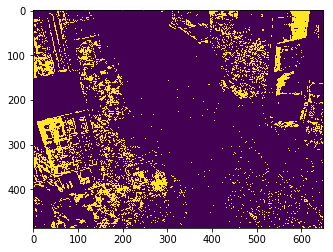

In [0]:
plt.imshow(R_area)
plt.show()

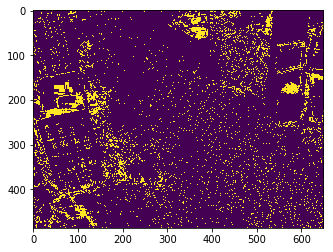

In [0]:
plt.imshow(G_area)
plt.show()

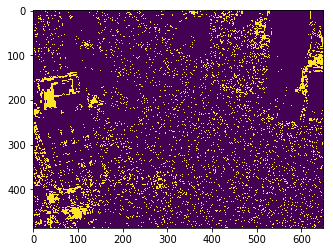

In [0]:
plt.imshow(B_area)
plt.show()

In [0]:
R_area_labels, R_area_nb = ndimage.label(R_area)
G_area_labels, G_area_nb = ndimage.label(G_area)
B_area_labels, B_area_nb = ndimage.label(B_area)

In [0]:
R_area_nb

5937

In [0]:
G_area_nb

16164

In [0]:
B_area_nb

19023

In [0]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as tf
import skimage
import skimage.color as skcolor
import skimage.io as skio
from PIL import Image
import cv2

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    return np.uint8(rgb.dot(xform.T))

def show(im):
    plt.imshow(im)
    plt.show()

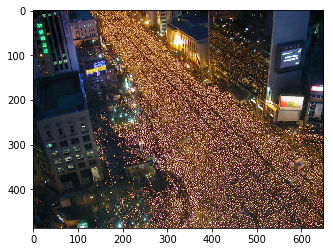

In [0]:
show(candle)

In [0]:
candle_t = rgb2ycbcr(candle)

In [0]:
candle_t.shape

(487, 650, 3)

In [0]:
candle_t_y = candle_t[:,:,0]

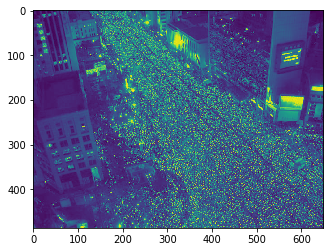

In [0]:
plt.imshow(candle_t_y)
plt.show()

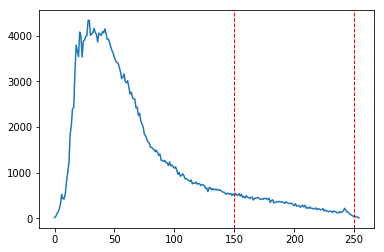

In [0]:
hi_candle_t_y, bins = np.histogram(candle_t_y, bins=np.arange(256))
fig, ax = plt.subplots()
ax.plot(bins[:-1], hi_candle_t_y)
plt.axvline(x=150, color='r', linestyle='--', linewidth=1)
plt.axvline(x=250, color='r', linestyle='--', linewidth=1)
plt.show()

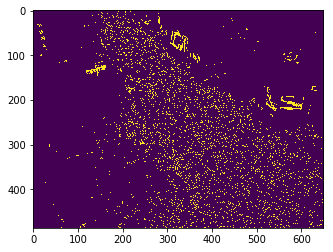

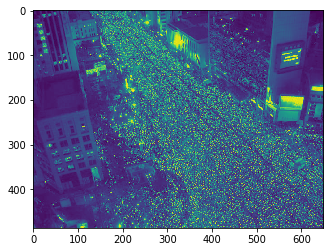

In [0]:
candle_t_y_area = np.logical_and(candle_t_y >=175, candle_t_y <= 230)
candle_t_y_labels, candle_t_y_nb = ndimage.label(candle_t_y_area)
plt.imshow(candle_t_y_area)
plt.show()
plt.imshow(candle_t_y)
plt.show()

In [0]:
candle_t_y_nb

8962